In [2]:
%load_ext autoreload

In [3]:
%reload_ext autoreload

In [4]:
# pip install seaborn

In [5]:
import pricing_ai
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set()
warnings.simplefilter('ignore')

### データ

In [6]:
first_pub = pricing_ai.get_preprocessing_data(sql_path='sql/first_pub.sql',col='min_date')

In [7]:
contract = pricing_ai.get_preprocessing_data(sql_path='sql/contract.sql',col='delete_date')

### 使用stockid

In [8]:
use_stockids = set(contract.stock_id.unique()) & set(first_pub.stock_id.unique())

In [9]:
use_stockids_dict = {key:1 for key in use_stockids}

### 使用stockidだけ

In [6]:
contract['use'] = contract.stock_id.map(use_stockids_dict)

In [7]:
pricing_ai.print_shape(contract)
contract = contract[contract.use == 1]
pricing_ai.print_shape(contract)

(969454, 7)
(903619, 7)


In [12]:
contract.day.quantile(0.25)

8.0

### 　掲載落ちの日付だけ残す

In [8]:
pricing_ai.print_shape(contract)
contract = contract[['stock_id', 'delete_date']]
pricing_ai.print_shape(contract)

(903619, 7)
(903619, 2)


### 掲載初日から掲載落ちするまでの日数を出す準備

In [9]:
first_pub_dict = first_pub.set_index('stock_id')['min_date'].to_dict()

In [10]:
contract['first_pub'] = contract.stock_id.map(first_pub_dict)

### 掲載初日から掲載落ちするまでの日数

In [11]:
contract['days_diff'] = contract['delete_date']-contract['first_pub']

In [12]:
contract['days_diff'] = contract.days_diff.astype('timedelta64[D]').astype(int)

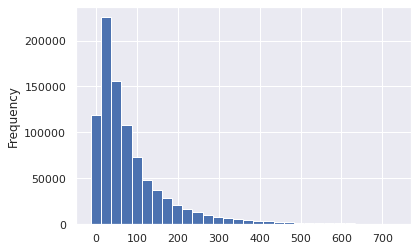

In [13]:
contract.days_diff.plot.hist(bins=30)
plt.show()

In [17]:
contract.days_diff.median()

53.0

In [18]:
contract.days_diff.mean()

86.00544366596984

In [19]:
contract.shape,contract.days_diff.median(), contract.days_diff.mean()

((903619, 4), 53.0, 86.00544366596984)

In [20]:
contract[contract.days_diff < contract.days_diff.mean()].shape[0]/contract.shape[0]

0.6730303369008398

In [21]:
pricing_ai.print_shape(contract)
contract = contract[contract.days_diff >0]
pricing_ai.print_shape(contract)

(903619, 4)
(903548, 4)


In [23]:
contract = contract.sort_values(by='days_diff')

In [27]:
contract.days_diff.nunique()

731

In [67]:
contract_cumsum = contract.groupby('days_diff').size().to_frame('days')

In [68]:
contract_cumsum['cumsum_days'] = contract_cumsum.days.cumsum()

In [69]:
contract_cumsum['cumsum_days_max'] = contract_cumsum.days.sum()

In [70]:
contract_cumsum['per_cumsum'] = contract_cumsum['cumsum_days']/contract_cumsum['cumsum_days_max']

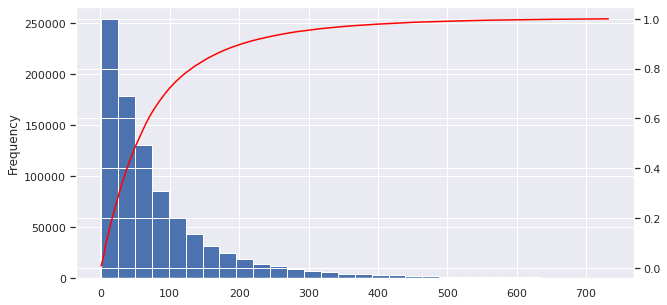

In [87]:
fig, axes = plt.subplots(1,1, figsize=(10,5))
ax0 = axes.twinx()
contract.days_diff.plot.hist(bins=30, ax=axes)
contract_cumsum.per_cumsum.plot(ax=ax0, c='red')
plt.show()

In [ ]:
stock_cars 